<big><div align='center' ><font size='5'><b>基于卷积神经网络的<font color="#DAA520">高斯朴素贝叶斯分类</font>人脸表情识别算法详解(FaceEmotionClassifier)</b></font></div><big/>

> 主讲人：**连亨尧**  
> 小组长：**李沅隆**  
> *Jupyter Notebook*  制作人：**连亨尧**  
> 报告联合制作人：**陈炳鑫，吴浩天，谢宇丰，李溢成，李沅隆**  


## <big>1.项目简介：<big/>

用搭载**Keras**的**tensorflow**框架通过**卷积神经网络**训练模型，使用**高斯朴素贝叶斯分类器**识别人类的情绪。根据情绪选择相应的emoji匹配

### 1.1项目效果

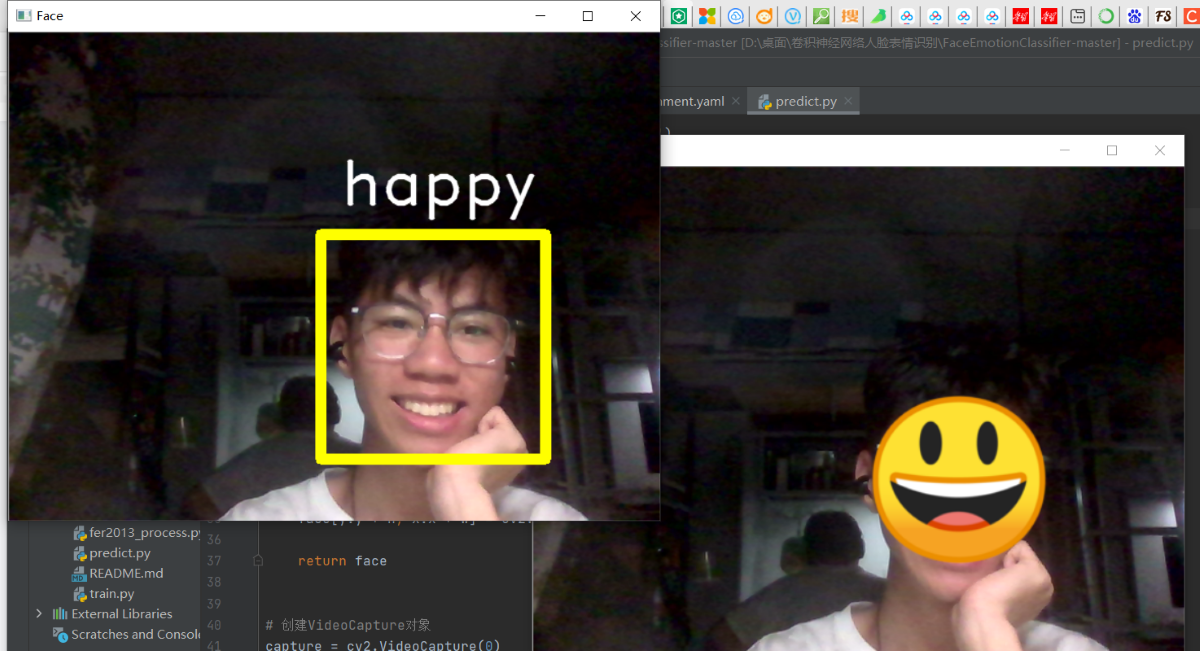

### 1.2配置及环境：


>**数据集：** Fer2013 ( kaggle挑战赛 ) ，Emoji表情集  
**神经网络框架：** Keras,Tensorflow-gpu  
**分类器：** 基于Opencv-Normal Bayes Classifier(正态贝叶斯分类)训练的贝叶斯分类器  
**python环境：** python==3.6.0 tensorflow-gpu==**1.8.0** keras-gpu==2.1.6 opencv==3.3.1

In [ ]:
#加载所需的包

#fer2013_process
import csv
import os
from PIL import Image
import numpy as np

#train
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

#perdict
import cv2
import numpy as np
from keras.models import model_from_json

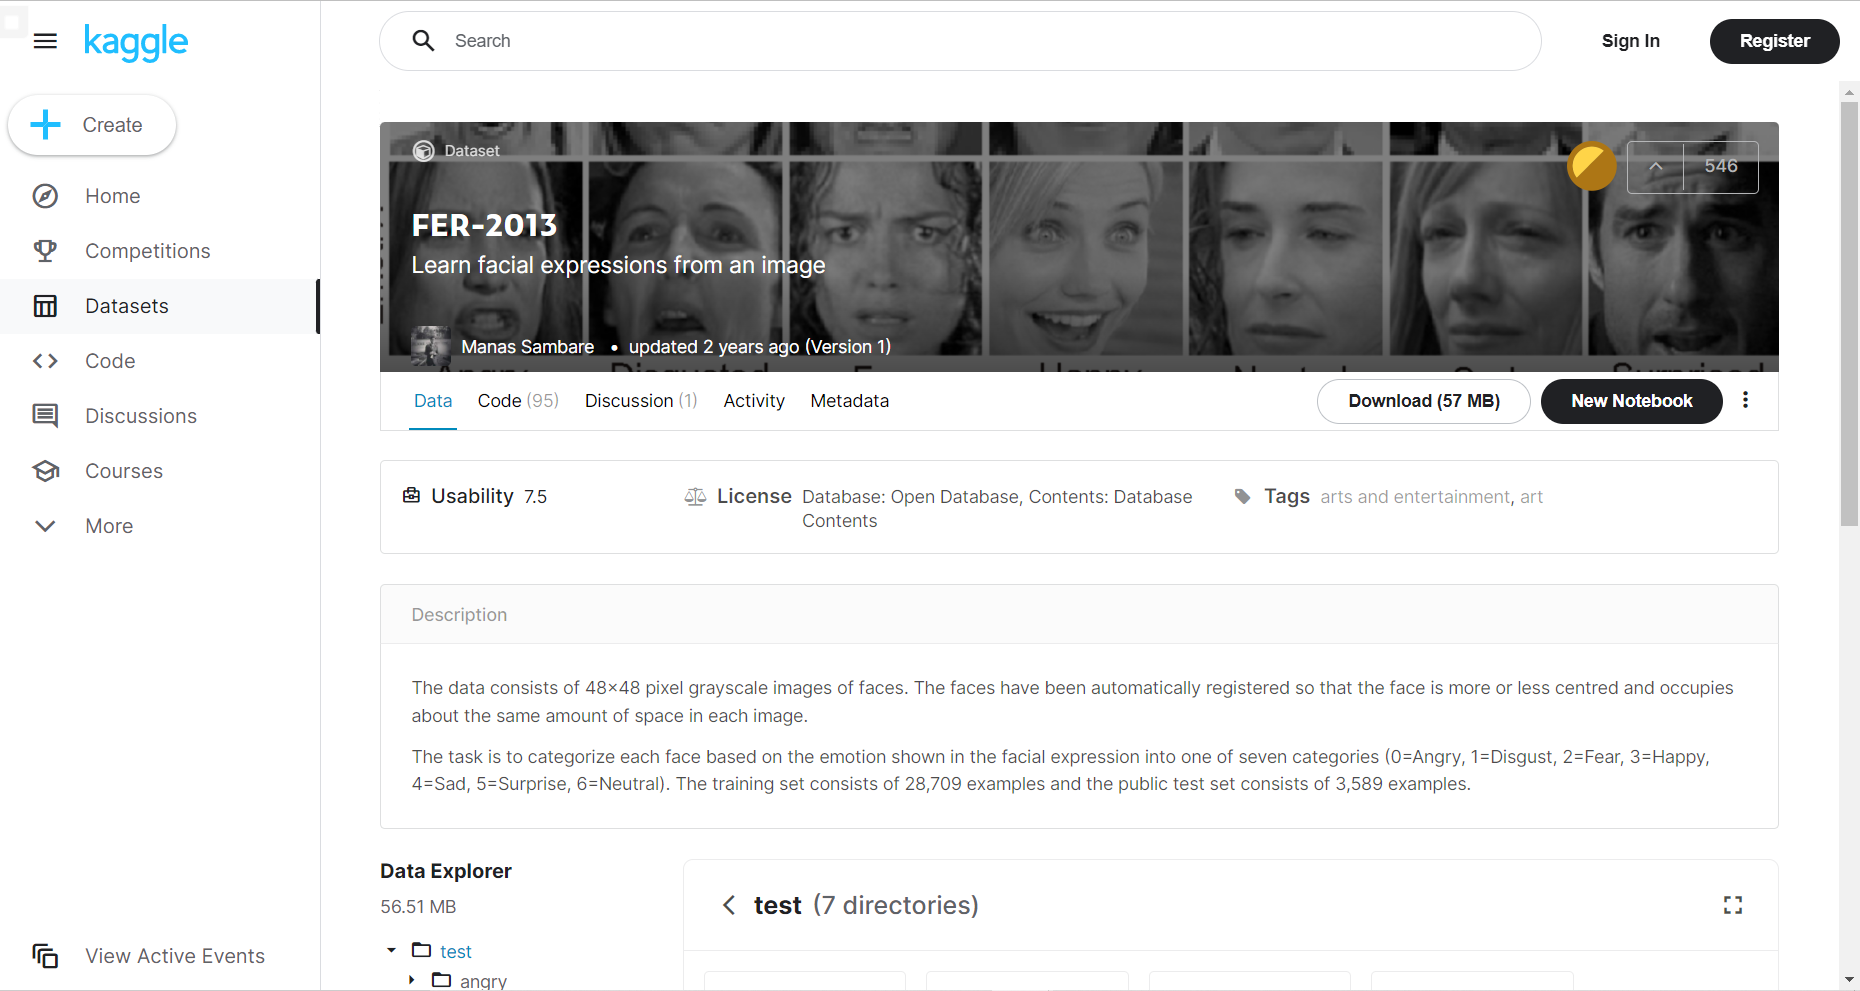


### 1.3总流程：


+ 对训练集预处理



+ 然后用处理好的fer2013的数据集训练深度卷积神经网络构建的模型识别人脸表情



+ 使用训练好的模型识别人脸的表情情绪



+ 根据识别结果，匹配合适的emoji遮住人脸



<big>**流程图：**<big/>

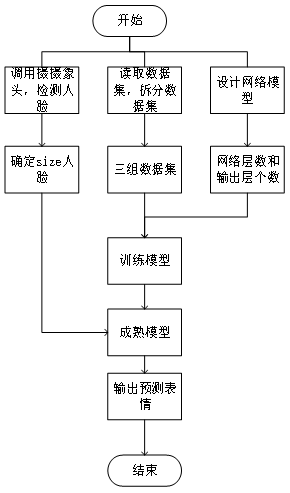

### 1.4参考文献：


+ https://github.com/zhouzaihang/FaceEmotionClassifier
+ https://blog.csdn.net/qq_42995327/article/details/114548137
+ https://blog.csdn.net/zhaocj/article/details/50615049
+ https://blog.csdn.net/u013841196/article/details/84262196
+ https://blog.csdn.net/GUET_DM_LQ/article/details/103765163
+ https://www.jianshu.com/p/399e5a3c7cc5
+ https://www.jianshu.com/p/1ea2949c0056

### 1.5知识介绍：

#### <big>1.5.1 人工神经网络<big/>

通俗说就是对大脑中神经元传输信息的过程的**模拟**，抽象成一个数学模型——对应的参数乘对应的**权重的累加和**

<img height="50" />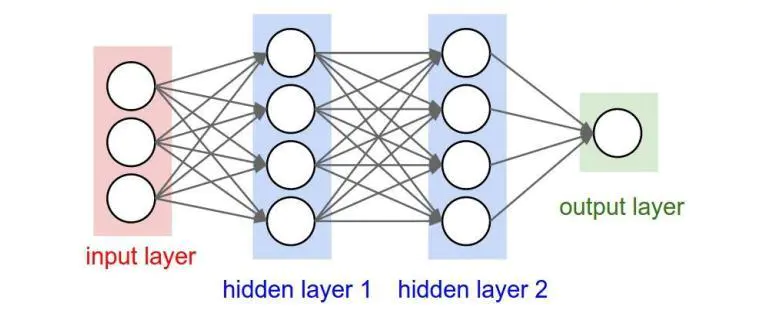<img height="50"/>

<big>**人工神经网络缺点：**<big/>

+ 局限于编程人的经验和能力
+ 本质上是个分类器，无法适应复杂环境
+ 全连接层非常多

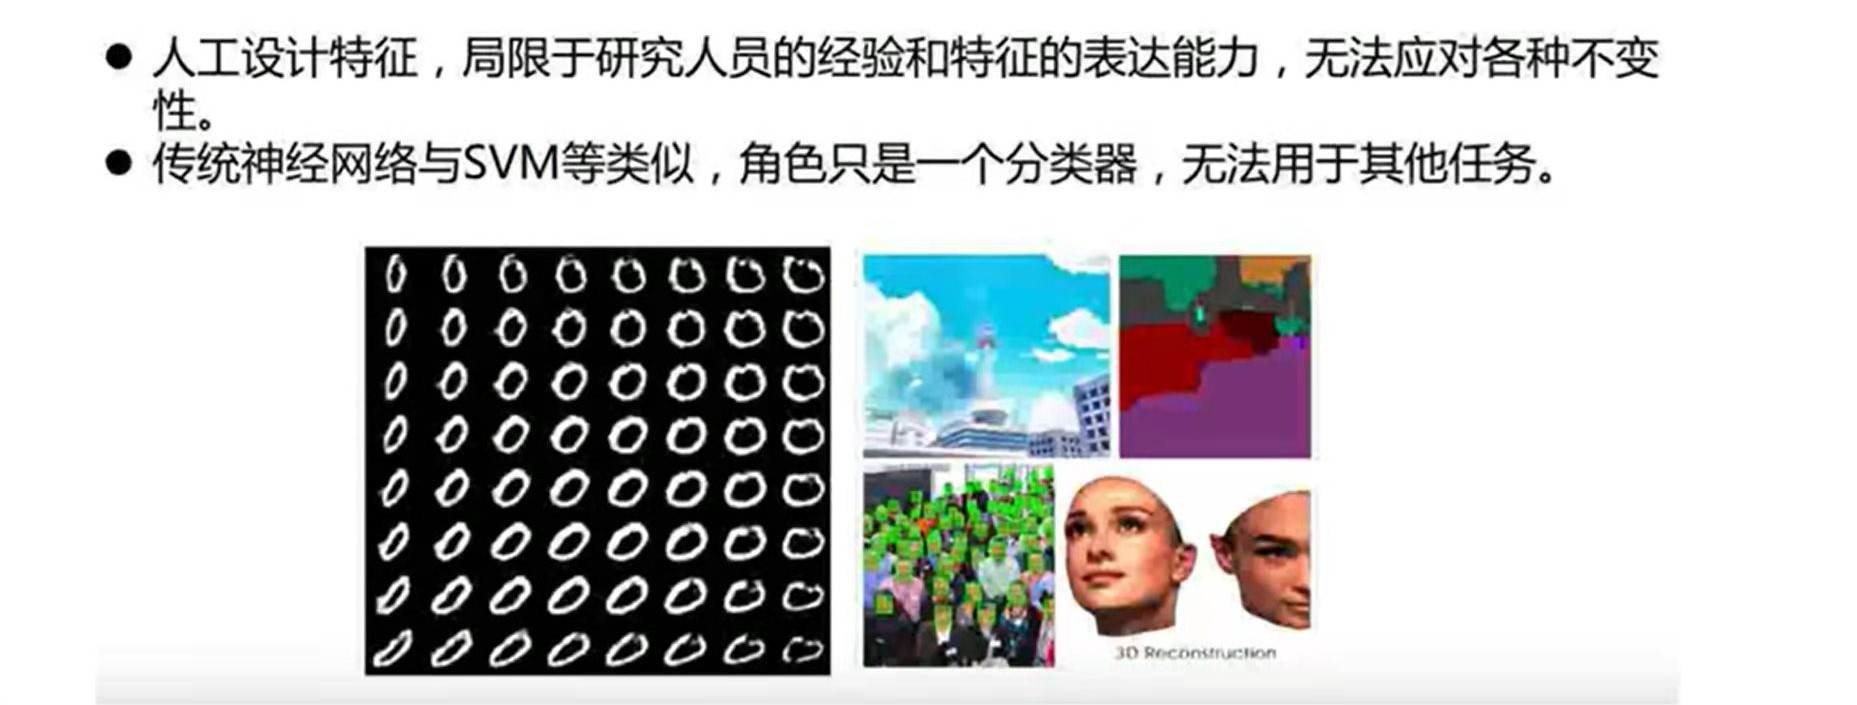

#### <big>1.5.2 [卷积神经网络](https://www.jianshu.com/p/1ea2949c0056)<big/>

其实卷积神经网络依旧是层级网络，只是**层的功能和形式做了变化**，可以说是传统神经网络的一个改进。比如下图中就多了许多传统神经网络没有的层

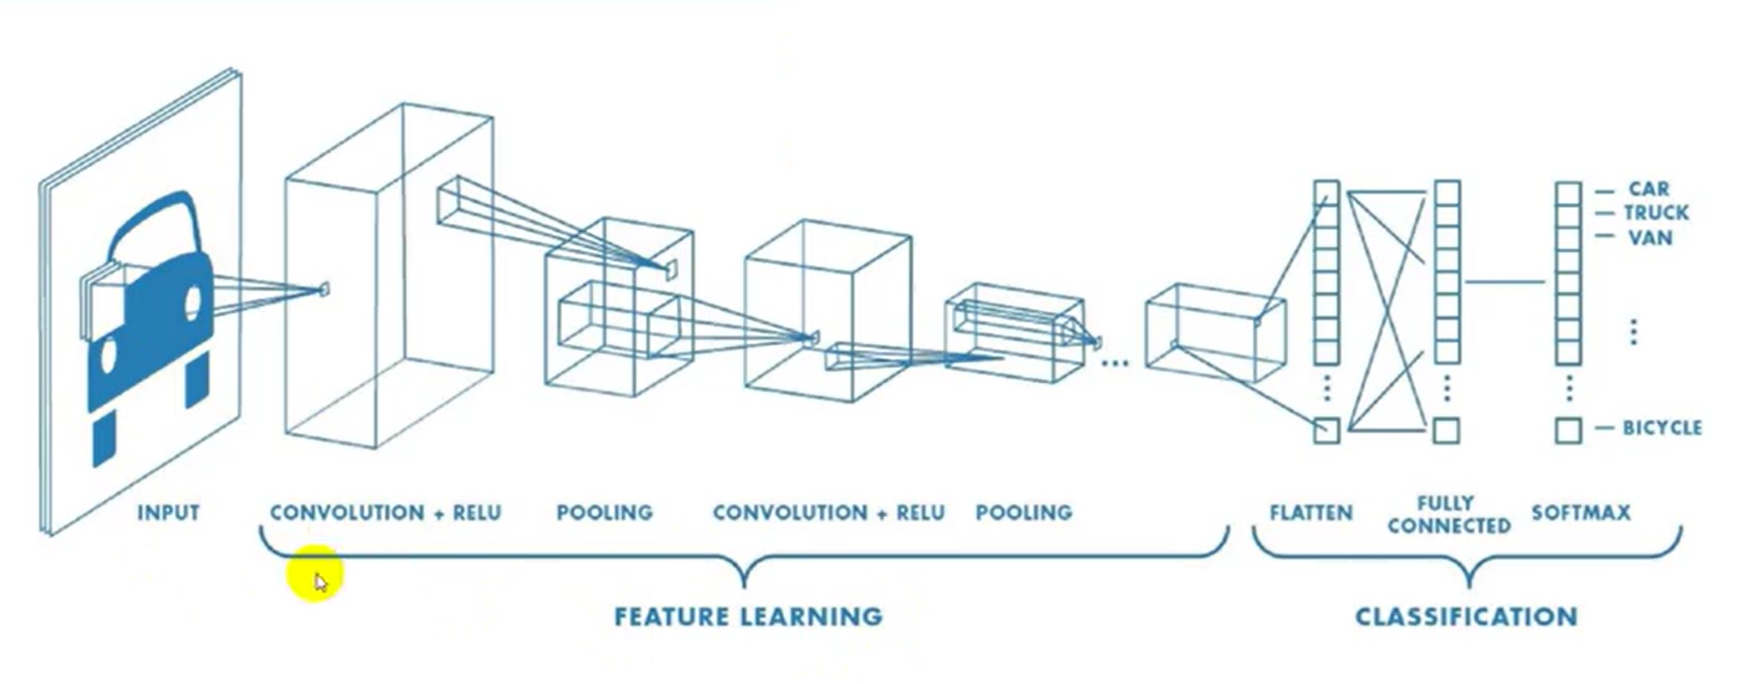

<big>**模型实质：** 卷积+分类器<big/>

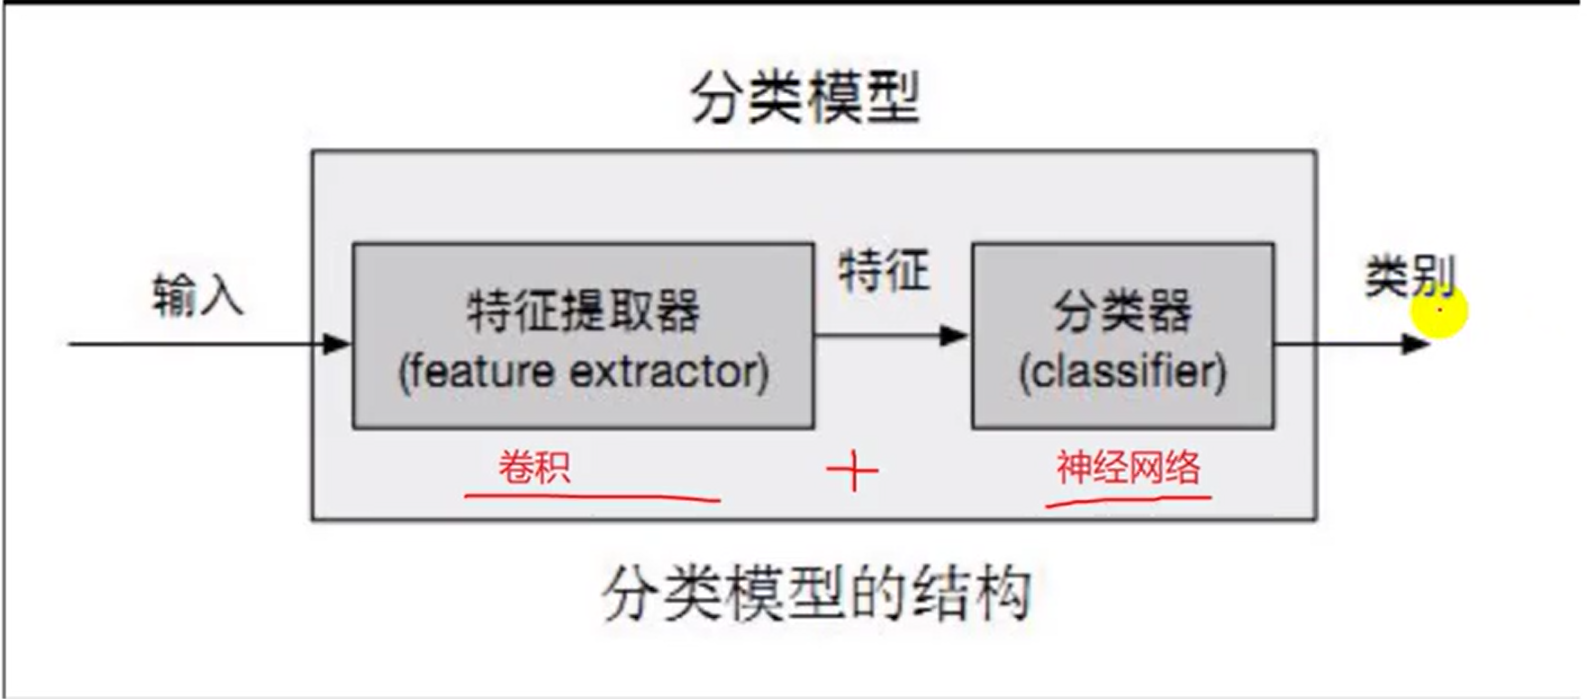

>**卷积神经网络的层级结构：**  
 >+ 数据输入层/ Input layer  
 >+ 卷积计算层/ CONV layer  
 >+ ReLU激活层 / ReLU layer  
 >+ 池化层 / Pooling layer
 >+ 全连接层 / FC layer  

>**卷积神经网络之优缺点：**  
 >**优点：**  
　　•共享卷积核，对高维数据处理无压力  
　　•无需手动选取特征，训练好权重，即得特征分类效果好  
 **缺点：**  
　　•需要调参，需要大样本量，训练最好要GPU  
　　•物理含义不明确（也就说，我们并不知道没个卷积层到底提取到的是什么特征，而且神经网络本身就是一种难以解释的“黑箱模型”）  

#### <big>1.5.3 朴素贝叶斯分类器<big/>

**贝叶斯公式：**

贝叶斯定理就是**逆向概率**问题  


    “如果我们事先并不知道袋子里面黑白球的比例，而是闭着眼睛摸出一个（或好几个）球，观察这些取出来的球的颜色之后，那么我们可以就此对袋子里面的黑白球的比例作出什么样的推测”。

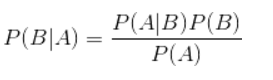

**换种表示方式：**

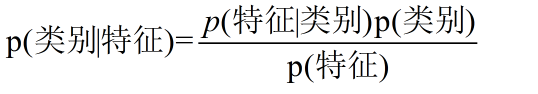

<big><big>**[朴素贝叶斯分类算法：](https://zhuanlan.zhihu.com/p/26262151)**<big/><big/>

<big>**假定数据如下：**<big/>

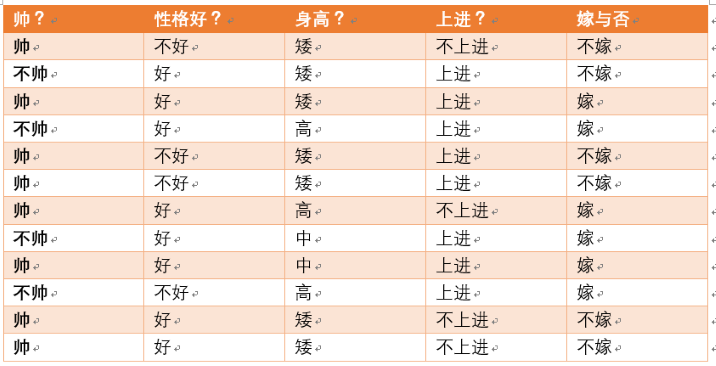

<big>现在给我们的问题是，如果一对男女朋友，男生想女生求婚，男生的四个特点分别是**不帅，性格不好，身高矮，不上进**  ，请你判断一下女生是嫁还是不嫁？<big/>

><big>这是一个典型的分类问题，转为数学问题就是比较**p(嫁|(不帅、性格不好、身高矮、不上进))**与**p(不嫁|(不帅、性格不好、身高矮、不上进))**的概率，谁的概率大，我就能给出嫁或者不嫁的答案！<big/>

><big>这里我们联系到朴素贝叶斯公式：<big/>

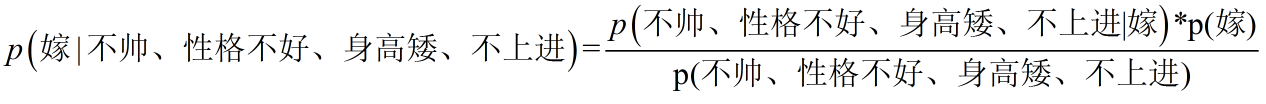

><big>   我们需要求p(嫁|(不帅、性格不好、身高矮、不上进),这是我们不知道的，但是通过朴素贝叶斯公式可以转化为好求的三个量,**p(不帅、性格不好、身高矮、不上进|嫁)、p（不帅、性格不好、身高矮、不上进)、p(嫁)**
  （至于为什么能求，后面会讲，那么就太好了，将待求的量转化为其它可求的值，这就相当于解决了我们的问题！）<big/>

## 2.数据集预处理

**下载得到的csv格式可以通过Excel看到格式为：**

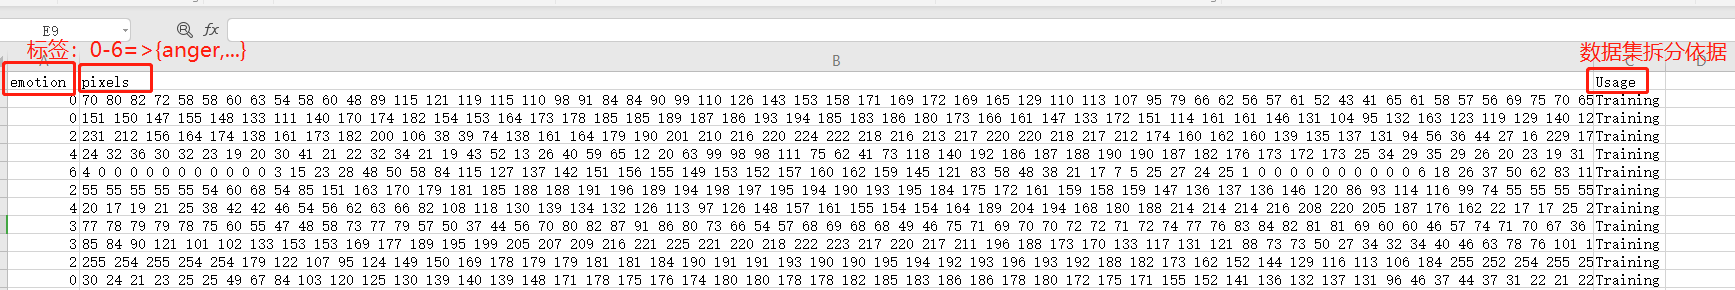

**所以首先打开csv文件，根据usage把数据集分为：训练集、测试集和验证集**

In [ ]:
data_path = os.getcwd() + "/data/"
csv_file = data_path + 'fer2013.csv'
train_csv = data_path + 'train.csv'
val_csv = data_path + 'val.csv'
test_csv = data_path + 'test.csv'

train_set = os.path.join(data_path, 'train')
val_set = os.path.join(data_path, 'val')
test_set = os.path.join(data_path, 'test')

with open(csv_file) as f:
    csv_r = csv.reader(f)
    header = next(csv_r) #Python中读取文件，指向的是文件的第一行，但是第一行是标题，所以用next()指向下一行，也就是从第二行开始
    print(header)
    rows = [row for row in csv_r]


    trn = [row[:-1] for row in rows if row[-1] == 'Training']
    csv.writer(open(train_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + trn)
    print(len(trn))

    val = [row[:-1] for row in rows if row[-1] == 'PublicTest']
    csv.writer(open(val_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + val)
    print(len(val))

    tst = [row[:-1] for row in rows if row[-1] == 'PrivateTest']
    csv.writer(open(test_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + tst)
    print(len(tst))

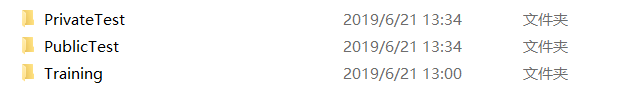

如果直接用当前数据是一个扁平的向量，**没有空间局部性**。用这样的数据直接进行训练，**就会失去空间结构和图像关系信息**。卷积神经网络可以保留空间信息，并且更适合图像分类问题，所以**要把数据转为图片**方便下面采用卷积神经网络进行训练

In [ ]:
for save_path, csv_file in [(train_set, train_csv), (val_set, val_csv), (test_set, test_csv)]:
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    num = 1
    with open(csv_file) as f:
        csv_r = csv.reader(f)
        header = next(csv_r)
        for i, (label, pixel) in enumerate(csv_r):
            # 0 - 6 文件夹内的图片label分别为：
            # angry ，disgust ，fear ，happy ，sad ，surprise ，neutral
            pixel = np.asarray([float(p) for p in pixel.split()]).reshape(48, 48)
            sub_folder = os.path.join(save_path, label)
            if not os.path.exists(sub_folder):
                os.makedirs(sub_folder)
            im = Image.fromarray(pixel).convert('L')
            image_name = os.path.join(sub_folder, '{:05d}.jpg'.format(i))
            print(image_name)
            im.save(image_name)

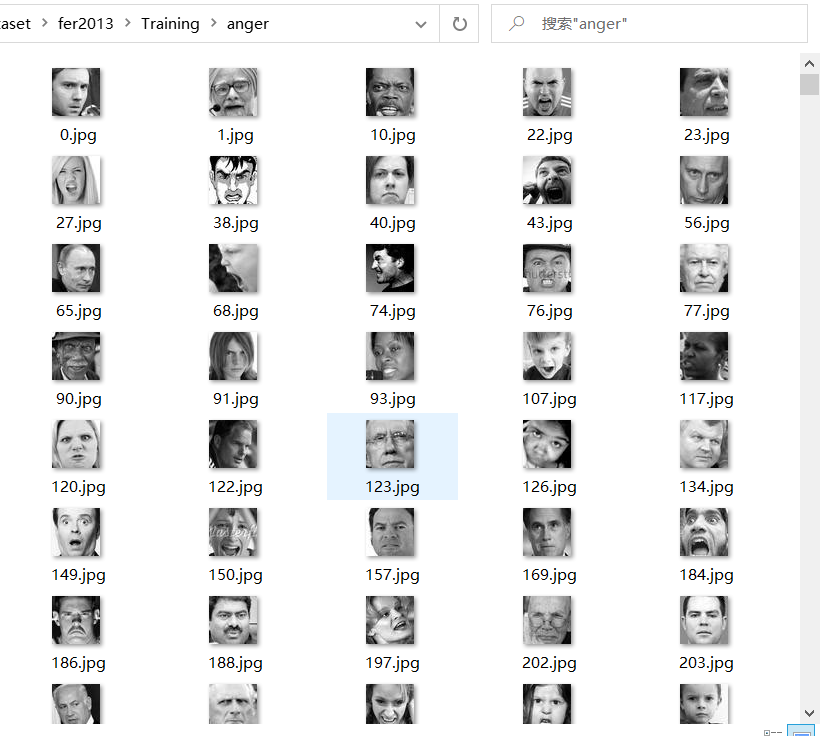

## 3.卷积神经网络模型

### 3.1深度卷积神经网络模型结构：

  
>**#卷积层：conv2D  池化层：MAaxPooling2D 激活函数：RELU**  
>**#扁平层：Flaten  全连接层：Dense  损失函数：Dropout**

>
>模型结构：
>
>conv2D +activation-relu +conv2D + activation-relu +MaxPooling2D +
>
>conv2D + activation-relu + MaxPooling2D +
>
>conv2D + activation-relu + MaxPooling2D +
>
>Flaten + Dense + activation-relu +
>
>Dropout + Dense + activation-relu +Dropout +softmax:Dense + activation-relu

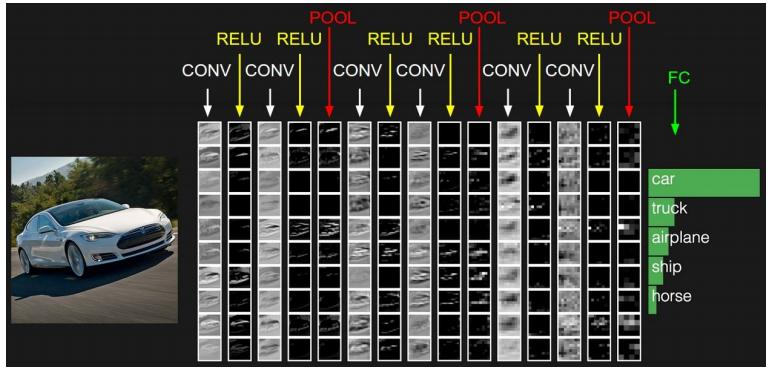

### 3.4代码详解：

**卷积阶段：**

使用keras添加一层二维滤波器，输出维度是**32**并且每个二维滤波器是1 * 1的卷积层

In [ ]:
self.model.add(Conv2D(32, (1, 1), strides=1, padding='same', input_shape=(img_size, img_size, 1)))

**使用ReLU激活函数：**

In [ ]:
self.model.add(Activation('relu'))

**池化层阶段：**


然后给网络学习32个5 * 5的滤波器，也用ReLU激活。并且紧接着一个最大池化层方法

In [ ]:
self.model.add(Conv2D(32, (5, 5), padding='same'))
self.model.add(Activation('relu'))
self.model.add(MaxPooling2D(pool_size=(2, 2)))

>之后第二层卷积阶段和第三层卷积阶段都是用ReLU激活函数，后面再次跟着最大池化层方法。第二层仍然是32个3 3大小的滤波器，第三层滤波器增加到64个5 5，**在更深的网络层增加滤波器数目是深度学习中一个普遍采用的技术**

In [ ]:
self.model.add(Conv2D(32, (3, 3), padding='same'))
self.model.add(Activation('relu'))
self.model.add(MaxPooling2D(pool_size=(2, 2)))

self.model.add(Conv2D(64, (5, 5), padding='same'))
self.model.add(Activation('relu'))
self.model.add(MaxPooling2D(pool_size=(2, 2)))

**深度管道的下一个阶段：**

首先用Flatten()获得一个扁平的网络

In [ ]:
self.model.add(Flatten())

用ReLU激活一个有2048个神经元的隐藏层，用Dropout丢弃到一半的网络，再添加一个1024个神经元的隐藏层，跟着一个关闭50%神经元的dropout层

In [ ]:
self.model.add(Activation('relu'))
self.model.add(Dropout(0.5))
self.model.add(Dense(1024))
self.model.add(Activation('relu'))
self.model.add(Dropout(0.5))

**输出层：**

添加作为输出7个类的softmax层，每个类对应一个类别

In [ ]:
self.model.add(Dense(num_classes))
self.model.add(Activation('softmax'))

## 4.训练模型

### 4.1 编译模型

这里选择随机梯度下降算法作为优化器

In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
self.model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### 4.2 通过数据增加改善性能

通常提高性能有两种方法，一种是定义一个更深、有更多卷积操作的网络，另一种训练更多的图片。这里用keras自带的ImageDataGenerator方法扩展数据集

In [ ]:
# 自动扩充训练样本
train_datagen = ImageDataGenerator(
    rescale=1. / 255, # 归一化处理
    shear_range=0.2, # 随机缩放
    zoom_range=0.2, # 放大
    horizontal_flip=True) # 随机水平翻转

### 4.3使用GPU训练模型

考虑到效率问题，keras提供了生成器针对模型的并发运行。我的理解就是**CPU处理生成图像，GPU上并行进行训练**

In [ ]:
# 归一化验证集
val_datagen = ImageDataGenerator(
    rescale=1. / 255)
eval_datagen = ImageDataGenerator(
    rescale=1. / 255)
# 以文件分类名划分label
train_generator = train_datagen.flow_from_directory(
    data_path + '/train',
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_siz,
    class_mode='categorical')
val_generator = val_datagen.flow_from_directory(
    data_path + '/val',
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_siz,
    class_mode='categorical')
eval_generator = eval_datagen.flow_from_directory(
    data_path + '/test',
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_siz,
    class_mode='categorical')
history_fit = self.model.fit_generator(
    train_generator,
    steps_per_epoch=800 / (batch_siz / 32),  # 28709
    nb_epoch=nb_epoch,
    validation_data=val_generator,
    validation_steps=2000,
)

### 4.4保存模型结构及权重

把结构保存为JSON字串，把权重保存到HDF5文件

In [ ]:
model_json = self.model.to_json()
with open(model_path + "/model_json.json", "w") as json_file:
    json_file.write(model_json)
self.model.save_weights(model_path + '/model_weight.h5')
self.model.save(model_path + '/model.h5')

## 5.人脸表情识别模块（贝叶斯分类器）

### 5.1 加载加载权重及模型结构

In [ ]:
# 从json中加载模型
json_file = open(model_path + 'model_json.json')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# 加载模型权重
model.load_weights(model_path + 'model_weight.h5')

### 5.2使用基于Opencv-Normal Bayes Classifier(正态贝叶斯分类)训练的贝叶斯分类器

In [ ]:
# 创建VideoCapture对象
capture = cv2.VideoCapture(0)

# 使用Opencv-Normal Bayes Classifier的贝叶斯人脸分类器
cascade = cv2.CascadeClassifier(model_path + 'haarcascade_frontalface_alt.xml')

# 实时获得摄像头数据
ret, frame = capture.read()

# 灰度化处理
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# 识别人脸位置
faceLands = cascade.detectMultiScale(gray, scaleFactor=1.1,
                                        minNeighbors=1, minSize=(120, 120))

#### 5.2.1创建高斯朴素贝叶斯分类器

In [ ]:
class NaiveBayes():
    #高斯朴素贝叶斯分类器

    #创建分类器属性
    def __init__(self):

        self._X_train = None
        self._y_train = None
        self._classes = None
        self._priorlist = None
        self._meanmat = None
        self._varmat = None
    
    #设置分类器模型
    def fit(self, X_train, y_train):
        
        self._X_train = X_train
        self._y_train = y_train
        self._classes = np.unique(self._y_train)                       #  得到各个类别
        priorlist = []
        meanmat0 = np.array([[0, 0, 0, 0]])
        varmat0 = np.array([[0, 0, 0, 0]])
        for i, c in enumerate(self._classes):
            # 计算每个种类的平均值，方差，先验概率
            X_Index_c = self._X_train[np.where(self._y_train == c)]        # 属于某个类别的样本组成的“矩阵”
            priorlist.append(X_Index_c.shape[0] / self._X_train.shape[0])  # 计算类别的先验概率
            X_index_c_mean = np.mean(X_Index_c, axis=0, keepdims=True)     # 计算该类别下每个特征的均值，结果保持二维状态[[3 4 6 2 1]]
            X_index_c_var = np.var(X_Index_c, axis=0, keepdims=True)       # 方差
            meanmat0 = np.append(meanmat0, X_index_c_mean, axis=0)         # 各个类别下的特征均值矩阵罗成新的矩阵，每行代表一个类别。
            varmat0 = np.append(varmat0, X_index_c_var, axis=0)
        self._priorlist = priorlist
        self._meanmat = meanmat0[1:, :]                                    #除去开始多余的第一行
        self._varmat = varmat0[1:, :]
    
    #分类器模型预测
    def predict(self,X_test):
        
        eps = 1e-10                                                        # 防止分母为0
        classof_X_test = []                                                #用于存放测试集中各个实例的所属类别
        for x_sample in X_test:
            matx_sample = np.tile(x_sample,(len(self._classes),1))         #将每个实例沿列拉长，行数为样本的类别数
            mat_numerator = np.exp(-(matx_sample - self._meanmat) ** 2 / (2 * self._varmat + eps))
            mat_denominator = np.sqrt(2 * np.pi * self._varmat + eps)
            list_log = np.sum(np.log(mat_numerator/mat_denominator),axis=1)# 每个类别下的类条件概率取对数后相加
            prior_class_x = list_log + np.log(self._priorlist)             # 加上类先验概率的对数
            prior_class_x_index = np.argmax(prior_class_x)                 # 取对数概率最大的索引
            classof_x = self._classes[prior_class_x_index]                 # 返回一个实例对应的类别
            classof_X_test.append(classof_x)
        return classof_X_test

    #分类器模型准确率
    def score(self, X_test, y_test):
        
        j = 0
        for i in range(len(self.predict(X_test))):
            if self.predict(X_test)[i] == y_test[i]:
                j += 1
        return ('accuracy: {:.10%}'.format(j / len(y_test)))


### 5.3识别人脸情绪

+ 根据识别出的脸部特征点，裁剪出脸部图像，然后调用模型预测情绪
+ 根据识别结果，用cv的rectangle在视频流上框出脸部并且用putText打上标签
+ 用EMOJI盖住人脸

In [ ]:
if len(faceLands) > 0:
    for faceLand in faceLands:
        x, y, w, h = faceLand
        images = []
        result = np.array([0.0] * num_class)

        # 裁剪出脸部图像
        image = cv2.resize(gray[y:y + h, x:x + w], (img_size, img_size))
        image = image / 255.0
        image = image.reshape(1, img_size, img_size, 1)

        # 调用模型预测情绪
        predict_lists = model.predict_proba(image, batch_size=32, verbose=1)
        result += np.array([predict for predict_list in predict_lists
                            for predict in predict_list])
        emotion = emotion_labels[int(np.argmax(result))]
        print("Emotion:", emotion)

# 框出脸部并且写上标签
cv2.rectangle(frame, (x - 20, y - 20), (x + w + 20, y + h + 20),
                (0, 255, 255), thickness=10)
cv2.putText(frame, '%s' % emotion, (x, y - 50),
            cv2.FONT_HERSHEY_DUPLEX, 2, (255, 255, 255), 2, 30)
cv2.imshow('Face', frame)

# 呈现用emoji替代后的画面
    emoji_show = frame.copy()

# 直接把emoji图片遮盖人脸会出现emoji背景变为黑色盖上去了。所以这里要蒙版处理一下，也就是保持emoji透明背景的特性，当然，这里所有图像都要归一化处理

def face2emoji(face, emotion_index, position):
    x, y, w, h = position
    emotion_image = cv2.resize(emotion_images[emotion_index], (w, h))
    overlay_img = emotion_image[:, :, :3]/255.0
    overlay_bg = emotion_image[:, :, 3:]/255.0
    background = (1.0 - overlay_bg)
    face_part = (face[y:y + h, x:x + w]/255.0) * background
    overlay_part = overlay_img * overlay_bg

    face[y:y + h, x:x + w] = cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0)

    return face

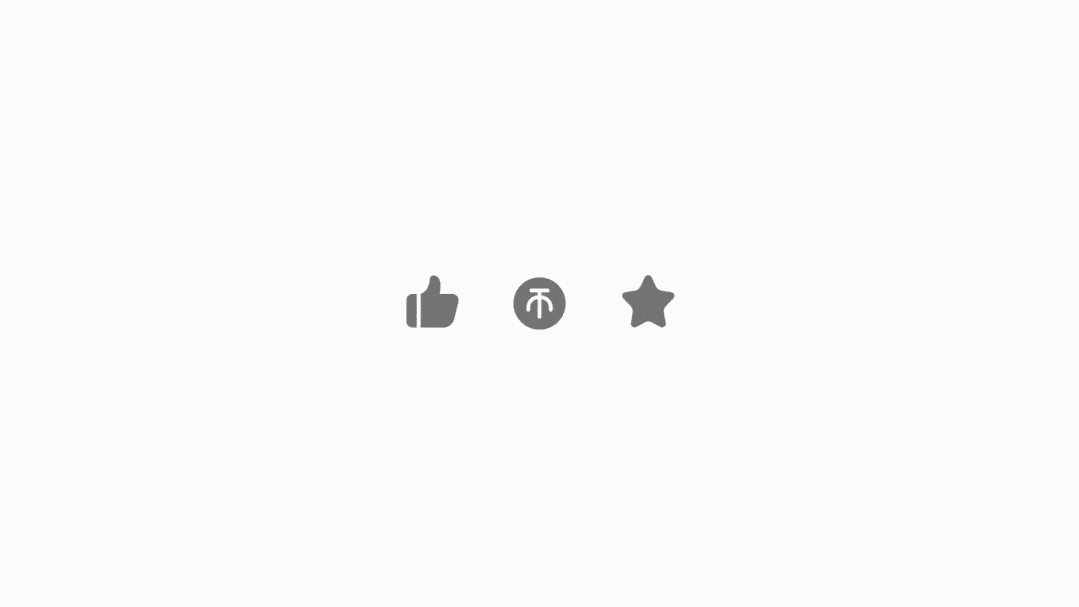